# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [69]:
import sys
sys.path.append("..")

from sklearn.metrics import mean_squared_error, mean_absolute_error

from src.utils import read_yaml, read_tiff
from src.metrics import evaluate_component_metrics

from generate_distance_map import apply_gaussian_distance_map
import numpy as np

from sample_selection import filter_components_by_mask

from scipy.ndimage import gaussian_filter

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import seaborn as sns

In [67]:
plt.rcParams["figure.dpi"] = 200


plt.rcParams['axes.axisbelow'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['ytick.labelleft'] = False

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [4]:
args = read_yaml("../args.yaml")

In [87]:
version_folder = "/home/luiz/multi-task-fcn/12.0_version_data"

gt_map = read_tiff(f"{version_folder}/segmentation/samples_A1_train2tif.tif")
gt_distance_map = read_tiff(f"{version_folder}/iter_000/distance_map/train_distance_map.tif")

train_gt_map = read_tiff(f"{version_folder}/segmentation/samples_A1_test2tif.tif")

old_pred_map = read_tiff(f"{version_folder}/segmentation/samples_A1_train2tif.tif")

new_pred_map = read_tiff(f"{version_folder}/iter_001/raster_prediction/join_class_itcFalse_1.1.TIF")+1

new_prob_map = read_tiff(f"{version_folder}/iter_001/raster_prediction/join_prob_itcFalse_1.1.TIF")

new_depth_map = read_tiff(f"{version_folder}/iter_001/raster_prediction/depth_itcFalse_1.1.TIF")

/home/luiz/multi-task-fcn/12.0_version_data/segmentation/samples_A1_train2tif.tif
/home/luiz/multi-task-fcn/12.0_version_data/iter_000/distance_map/train_distance_map.tif
/home/luiz/multi-task-fcn/12.0_version_data/segmentation/samples_A1_test2tif.tif
/home/luiz/multi-task-fcn/12.0_version_data/segmentation/samples_A1_train2tif.tif
/home/luiz/multi-task-fcn/12.0_version_data/iter_001/raster_prediction/join_class_itcFalse_1.1.TIF
/home/luiz/multi-task-fcn/12.0_version_data/iter_001/raster_prediction/join_prob_itcFalse_1.1.TIF
/home/luiz/multi-task-fcn/12.0_version_data/iter_001/raster_prediction/depth_itcFalse_1.1.TIF


In [88]:
np.unique(gt_map)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=uint8)

In [89]:
new_pred_map = np.where(new_prob_map > 0.95, new_pred_map, 0)

In [90]:
filter_components_by_mask(args.data_path ,new_pred_map)

/home/luiz/multi-task-fcn/11.1_version_data/mask.tif
Filtering components out of the area of the experiment


100%|██████████| 293/293 [00:13<00:00, 21.49it/s]


In [91]:
np.unique(new_pred_map)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=uint8)

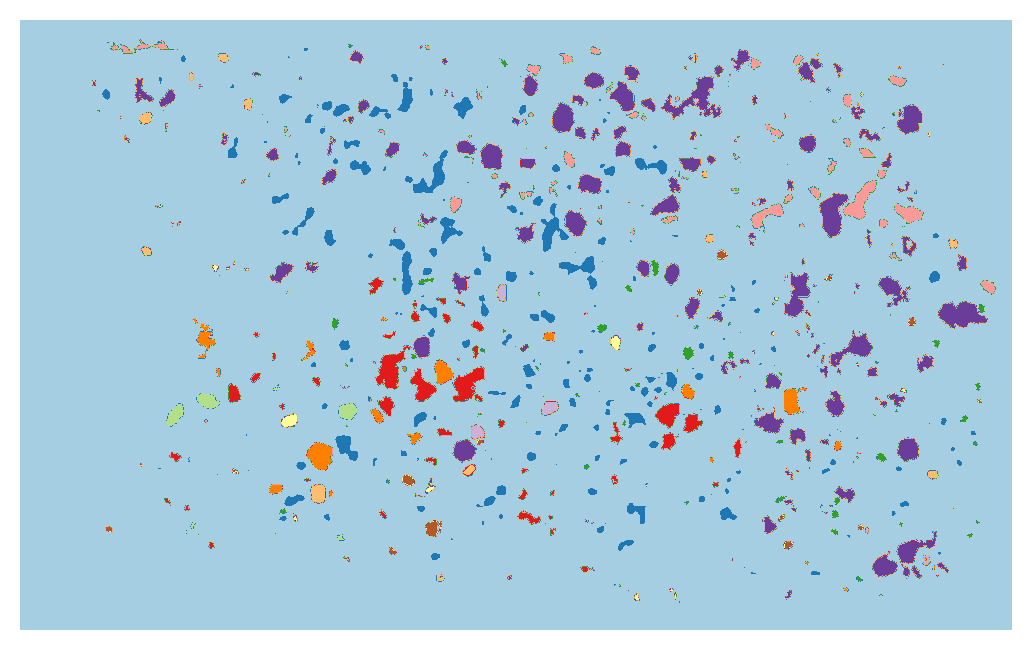

In [92]:
plt.imshow(new_pred_map, cmap = "Paired")

In [105]:
for thr in np.arange(1, 1.35, 0.05):
    print(thr)
    selected_sample = np.where((new_prob_map + new_depth_map) > thr, new_pred_map, 0)
    print(evaluate_component_metrics(gt_map, selected_sample))

1.0
{'Accuracy': 99.41410655478865, 'avgF1': 99.37920535887186, 'avgPrec': 100.0, 'avgRec': 98.80557071210877}
1.05
{'Accuracy': 99.25565029097307, 'avgF1': 99.35308087035018, 'avgPrec': 100.0, 'avgRec': 98.75481874153118}
1.1
{'Accuracy': 94.77094329408581, 'avgF1': 98.10188882418224, 'avgPrec': 100.0, 'avgRec': 96.3465366757369}
1.1500000000000001
{'Accuracy': 84.84966391482834, 'avgF1': 93.55735248780658, 'avgPrec': 100.0, 'avgRec': 88.05630978810976}
1.2000000000000002
{'Accuracy': 74.7434249109036, 'avgF1': 87.4042850112641, 'avgPrec': 100.0, 'avgRec': 77.8095320219957}
1.2500000000000002
{'Accuracy': 65.71254567600488, 'avgF1': 81.21915107818589, 'avgPrec': 100.0, 'avgRec': 68.56437924766922}
1.3000000000000003
{'Accuracy': 58.12356205169847, 'avgF1': 75.48885457237317, 'avgPrec': 100.0, 'avgRec': 60.818382305944766}
1.3500000000000003
{'Accuracy': 51.27667253124013, 'avgF1': 69.99260812087807, 'avgPrec': 100.0, 'avgRec': 54.03304248092417}


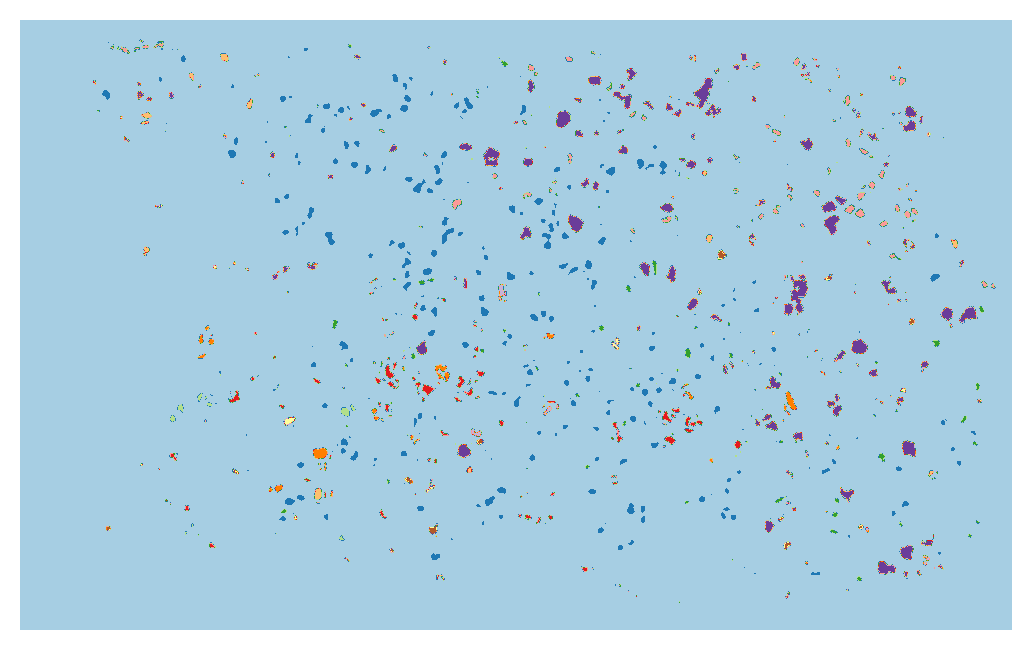

In [106]:
plt.imshow(selected_sample, cmap="Paired")
plt.show()

In [11]:
# # Select only the components with confidence higher than 0.99


# # depth map
# new_depth_map = gaussian_filter(new_depth_map, sigma = 9)

# # prob map
# new_prob_map = gaussian_filter(new_prob_map, sigma = 9)

# new_prob_map = np.where(new_prob_map > 0.95, new_prob_map, 0)
for thr in [0.1, 0.15 , 0.25, 0.2, 0.25, 0.3, 0.35, 0.4]:
    print(thr)
    selected_sample = np.where((new_depth_map) > thr, new_pred_map1, 0)
    print(evaluate_component_metrics(test_gt_map, new_pred_map1)["avgF1"])
    
    print("-----------------")


_evaluate_component_metrics(test_gt_map, new_pred_map1)["avgRec"]


0.1
0.0
6.647385750016986
-----------------
0.15
0.0
6.648847023324588
-----------------
0.25
0.0
6.651843203810386
-----------------
0.2
0.0
6.651843203810386
-----------------
0.25
0.0
6.651843203810386
-----------------
0.3
0.0


KeyboardInterrupt: 

In [ ]:
args = read_yaml("args.yaml")